In [83]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [85]:
df = pd.read_csv('./movies_metadata.csv')
df.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [86]:
df.columns, df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

(Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
        'imdb_id', 'original_language', 'original_title', 'overview',
        'popularity', 'poster_path', 'production_companies',
        'production_countries', 'release_date', 'revenue', 'runtime',
        'spoken_languages', 'status', 'tagline', 'title', 'video',
        'vote_average', 'vote_count'],
       dtype='object'), (45466, 24), None)

original_title和original_title的区别

In [87]:
df[df['original_title'] != df['original_title']][['title', 'original_title']]

,title,original_title


In [88]:
df = df.drop('original_title', axis=1)
df = df.drop('imdb_id', axis=1)

In [89]:
df['revenue'].value_counts()

0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
6000000.0         17
5000000.0         14
8000000.0         13
500000.0          13
14000000.0        12
1.0               12
7000000.0         11
20000000.0        10
1000000.0         10
3000000.0         10
1500000.0          9
4000000.0          9
3.0                9
2500000.0          8
4100000.0          8
25000000.0         8
16000000.0         8
30000000.0         8
15000000.0         8
4300000.0          7
18000000.0         7
13000000.0         7
1400000.0          6
100000000.0        6
9000000.0          6
               ...  
26533200.0         1
40485039.0         1
122915111.0        1
80936232.0         1
161849455.0        1
245676146.0        1
18130888.0         1
316000.0           1
29450919.0         1
6629178.0          1
89289910.0         1
1133031.0          1
20225989.0         1
40452643.0         1
26518355.0         1
57231524.0         1
10113733.0   

In [90]:
df['revenue'] = df['revenue'].replace(0, np.nan)
df[df['revenue'] == 0].shape

(0, 22)

budget是object类型，把它转为numeric类型

In [91]:
df['budget'].value_counts(dropna=False)

0            36573
5000000        286
10000000       259
20000000       243
2000000        242
15000000       226
3000000        223
25000000       206
1000000        197
30000000       190
4000000        181
6000000        174
12000000       172
40000000       167
8000000        155
500000         142
35000000       141
7000000        137
50000000       124
1500000        120
60000000       110
18000000       105
3500000        103
2500000        100
13000000        89
9000000         87
11000000        83
14000000        76
16000000        75
22000000        71
             ...  
17311            1
750              1
110125           1
4090000          1
1114000          1
1590000          1
1488410          1
592              1
66500            1
1089360          1
17010000         1
482910           1
1816720          1
10600000         1
63500            1
686              1
222000           1
1558000          1
417000           1
3650000          1
76000            1
3780000     

In [92]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

构建和剥离新特征

In [93]:
df['return'] = df['revenue']/df['budget']
df['return'].value_counts(dropna=False)

NaN              40085
 1.000000           20
 2.000000           12
 4.000000           11
 5.000000            8
 3.000000            7
 2.500000            7
 1.333333            7
 1.500000            6
 10.000000           4
 7.000000            4
 4.666667            4
 0.250000            4
 0.216667            3
 5.833333            3
 2.533333            3
 15.000000           3
 0.800000            3
 3.400000            3
 8.333333            3
 3.333333            3
 2.800000            3
 2.285714            3
 16.000000           3
 0.500000            3
 4.275705            2
 3.600000            2
 1.100460            2
 1.300000            2
 1.200000            2
                 ...  
 5.194769            1
 0.188394            1
 5.542805            1
 6.825228            1
 0.184841            1
 12890.386667        1
 2.684266            1
 0.686888            1
 6.584507            1
 0.603503            1
 3.513208            1
 0.833333            1
 0.511111  

In [94]:
df[df['return'].isnull()].shape , df.shape

((40085, 23), (45466, 23))

具有的revenue/budget的数据数目，足够分析

In [95]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x : str(x).split('-')[0] if x != np.nan else np.nan)

In [96]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

成人片大约为0，放弃此特征

In [97]:
df = df.drop('adult', axis=1)

In [103]:
df['title'] = df['title'].replace(np.nan, '')
df['overview'] = df['overview'].replace(np.nan, '')

In [104]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='red', height=2000, width=4000).generate(title_corpus)
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)

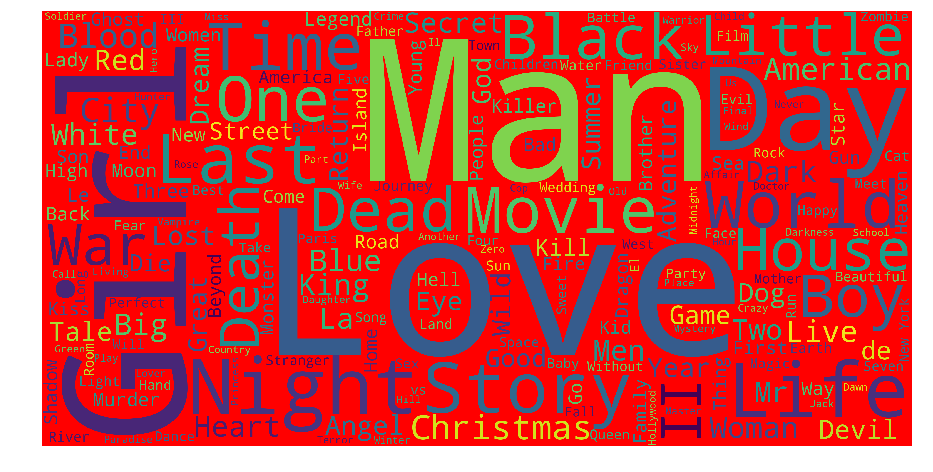

In [105]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

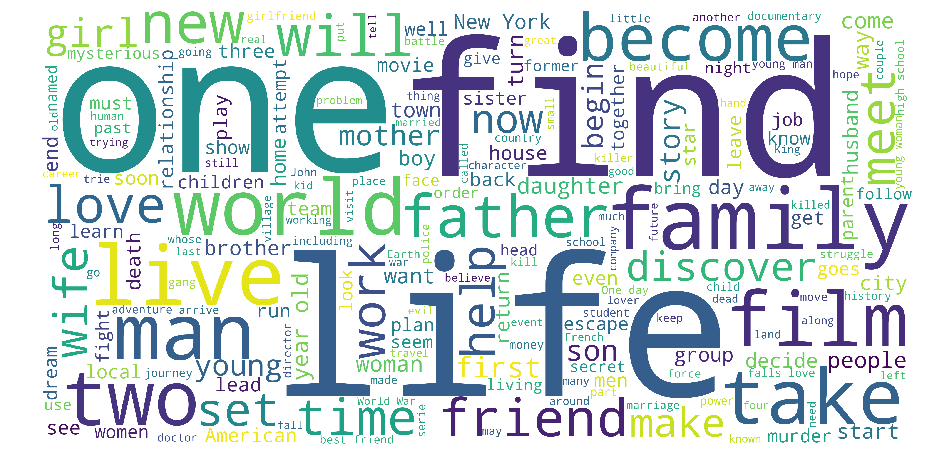

In [106]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [109]:
df['original_language'].value_counts(dropna=False)

en       32269
fr        2438
it        1529
ja        1350
de        1080
es         994
ru         826
hi         508
ko         444
zh         409
sv         384
pt         316
cn         313
fi         297
nl         248
da         225
pl         219
tr         150
cs         130
el         113
no         106
fa         101
hu         100
ta          78
th          76
he          67
sr          63
ro          57
te          45
ar          39
         ...  
bm           3
iu           2
pa           2
lo           2
bo           2
mn           2
ps           2
af           2
am           2
ne           2
104.0        1
zu           1
jv           1
tg           1
82.0         1
mt           1
uz           1
eo           1
si           1
fy           1
sm           1
68.0         1
lb           1
qu           1
rw           1
cy           1
la           1
hy           1
gl           1
ay           1
Name: original_language, Length: 93, dtype: int64

大部分是英语片 看看都是哪个国家排的

In [112]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)

In [117]:
df['production_countries'] = df['production_countries'].apply(
    lambda x : [i['name'] for i in x] if isinstance(x, list) else [])

In [118]:
df['production_countries']

0                               [United States of America]
1                               [United States of America]
2                               [United States of America]
3                               [United States of America]
4                               [United States of America]
5                               [United States of America]
6                      [Germany, United States of America]
7                               [United States of America]
8                               [United States of America]
9               [United Kingdom, United States of America]
10                              [United States of America]
11                      [France, United States of America]
12                              [United States of America]
13                              [United States of America]
14       [France, Germany, Italy, United States of Amer...
15                      [France, United States of America]
16              [United Kingdom, United States of Americ

In [141]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

上句代码的解释

In [136]:
df.iloc[1:15].apply(lambda x: pd.Series(x['production_countries']), axis=1)

,0,1,2,3
1,United States of America,NaN,NaN,NaN
2,United States of America,NaN,NaN,NaN
3,United States of America,NaN,NaN,NaN
4,United States of America,NaN,NaN,NaN
5,United States of America,NaN,NaN,NaN
6,Germany,United States of America,NaN,NaN
7,United States of America,NaN,NaN,NaN
8,United States of America,NaN,NaN,NaN
9,United Kingdom,United States of America,NaN,NaN
10,United States of America,NaN,NaN,NaN


In [137]:
df.iloc[1:15].apply(lambda x: pd.Series(x['production_countries']), axis=1).stack()

1   0    United States of America
2   0    United States of America
3   0    United States of America
4   0    United States of America
5   0    United States of America
6   0                     Germany
    1    United States of America
7   0    United States of America
8   0    United States of America
9   0              United Kingdom
    1    United States of America
10  0    United States of America
11  0                      France
    1    United States of America
12  0    United States of America
13  0    United States of America
14  0                      France
    1                     Germany
    2                       Italy
    3    United States of America
dtype: object

In [139]:
df.iloc[1:15].apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
#remove 第一列索引 and reset the index to the default integer index

1     United States of America
2     United States of America
3     United States of America
4     United States of America
5     United States of America
6                      Germany
6     United States of America
7     United States of America
8     United States of America
9               United Kingdom
9     United States of America
10    United States of America
11                      France
11    United States of America
12    United States of America
13    United States of America
14                      France
14                     Germany
14                       Italy
14    United States of America
dtype: object

In [145]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,countries
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,United States of America
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,United States of America
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,United States of America
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,United States of America
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995,United States of America
5,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.123947,1995,United States of America
6,NaN,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,en,An ugly duckling having undergone a remarkable...,6.67728,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,NaN,1995,Germany
6,NaN,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,en,An ugly duckling having undergone a remarkable...,6.67728,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,NaN,1995,United States of America
7,NaN,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,NaN,1995,United States of America
8,NaN,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,en,International action superstar Jean Claude Van...,5.23158,/eoWvKD60lT95Ss1MYNgVExpo5iU.jp

In [146]:
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df

,countries
United States of America,21153
United Kingdom,4094
France,3940
Germany,2254
Italy,2169
Canada,1765
Japan,1648
Spain,964
Russia,912
India,828


In [148]:
con_df['country'] = con_df.index
con_df['country'] 

United States of America                            United States of America
United Kingdom                                                United Kingdom
France                                                                France
Germany                                                              Germany
Italy                                                                  Italy
Canada                                                                Canada
Japan                                                                  Japan
Spain                                                                  Spain
Russia                                                                Russia
India                                                                  India
Hong Kong                                                          Hong Kong
Sweden                                                                Sweden
Australia                                                          Australia

In [149]:
con_df.columns = ['num_movies', 'country']
con_df

,num_movies,country
United States of America,21153,United States of America
United Kingdom,4094,United Kingdom
France,3940,France
Germany,2254,Germany
Italy,2169,Italy
Canada,1765,Canada
Japan,1648,Japan
Spain,964,Spain
Russia,912,Russia
India,828,India


In [150]:
con_df.reset_index()

,index,num_movies,country
0,United States of America,21153,United States of America
1,United Kingdom,4094,United Kingdom
2,France,3940,France
3,Germany,2254,Germany
4,Italy,2169,Italy
5,Canada,1765,Canada
6,Japan,1648,Japan
7,Spain,964,Spain
8,Russia,912,Russia
9,India,828,India


In [154]:
con_df = con_df.reset_index().drop('index', axis=1)
con_df = con_df[con_df['country'] != 'United States of America']
con_df

,num_movies,country
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India
10,596,Hong Kong


没想到Japan出产英语片也蛮多,接着看看 系列电影

In [159]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]


In [160]:
df_fran

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,Toy Story Collection,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
2,Grumpy Old Men Collection,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
4,Father of the Bride Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995
9,James Bond Collection,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,en,James Bond must unmask the mysterious head of ...,14.686,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...",...,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,6.072311,1995
12,Balto Collection,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,en,An outcast half-wolf risks his life to prevent...,12.1407,/gV5PCAVCPNxlOLFM1bKk50EqLXO.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,NaN,1995
18,Ace Ventura Collection,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,9273,en,"Summoned from an ashram in Tibet, Ace finds hi...",8.20545,/wRlGnJhEzcxBjvWtvbjhDSU1cIY.jpg,"[{'name': 'O Entertainment', 'id': 5682}, {'na...",...,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0,7.079518,1995
20,Chili Palmer Collection,30250000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,8012,en,Chili Palmer is a Miami mobster who gets sent ...,12.6696,/vWtDUUgQAsVyvRW4mE75LBgVm2e.jpg,"[{'name': 'Jersey Films', 'id': 216}, {'name':...",...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,False,6.4,305.0,3.805012,1995
33,Babe Collection,30000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,9598,en,Babe is a little pig who doesn't quite know hi...,14.4048,/gN6X3fwPya8pLffk9OEWV3DqBnE.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A little pig goes a long way.,Babe,False,6.0,756.0,8.471164,1995
43,Mortal Kombat Collection,18000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",NaN,9312,en,For nine generations an evil sorcerer has been...,10.8701,/bdXWixjWVA7Y03PvW74xufrROiJ.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Nothing In This World Has Prepared You For This.,Mortal Kombat,False,5.4,452.0,6.788662,1995
47,Pocahontas Collection,55000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,10530,en,History comes gloriously to life in Disney's e...,13.2801,/qk95miOV8wDABbO5gyCpCrvbVFu.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,81.0,"[{'iso_639_1'

In [166]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue':['mean', 'sum', 'count']}).reset_index()

In [168]:
fran_pivot.sort_values('sum',ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [169]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [ ]:
平均每部影片的票房比总票房度量要好一点

In [170]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


In [ ]:
发行公司

In [172]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [175]:
df['production_companies'].apply(lambda x : pd.Series(x))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Pixar Animation Studios,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TriStar Pictures,Teitler Film,Interscope Communications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Warner Bros.,Lancaster Gate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Twentieth Century Fox Film Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sandollar Productions,Touchstone Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Regency Enterprises,Forward Pass,Warner Bros.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Paramount Pictures,Scott Rudin Productions,Mirage Enterprises,Sandollar Productions,Constellation Entertainment,Worldwide,Mont Blanc Entertainment GmbH,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Walt Disney Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Universal Pictures,Imperial Entertainment,Signature Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United Artists,Eon Productions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df['production_companies'].apply(lambda x : pd.Series(x)).stack()

0      0                   Pixar Animation Studios
1      0                          TriStar Pictures
       1                              Teitler Film
       2                 Interscope Communications
2      0                              Warner Bros.
       1                            Lancaster Gate
3      0    Twentieth Century Fox Film Corporation
4      0                     Sandollar Productions
       1                       Touchstone Pictures
5      0                       Regency Enterprises
       1                              Forward Pass
       2                              Warner Bros.
6      0                        Paramount Pictures
       1                   Scott Rudin Productions
       2                        Mirage Enterprises
       3                     Sandollar Productions
       4               Constellation Entertainment
       5                                 Worldwide
       6             Mont Blanc Entertainment GmbH
7      0                      W

In [177]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)

0                       Pixar Animation Studios
1                              TriStar Pictures
1                                  Teitler Film
1                     Interscope Communications
2                                  Warner Bros.
2                                Lancaster Gate
3        Twentieth Century Fox Film Corporation
4                         Sandollar Productions
4                           Touchstone Pictures
5                           Regency Enterprises
5                                  Forward Pass
5                                  Warner Bros.
6                            Paramount Pictures
6                       Scott Rudin Productions
6                            Mirage Enterprises
6                         Sandollar Productions
6                   Constellation Entertainment
6                                     Worldwide
6                 Mont Blanc Entertainment GmbH
7                          Walt Disney Pictures
8                            Universal P

In [179]:
s.name = 'companies'

In [180]:
com_df = df.drop('production_companies', axis=1).join(s) #s 必须要有name

In [181]:
com_df 

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_countries,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year,companies
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995,Pixar Animation Studios
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,TriStar Pictures
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Teitler Film
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035,1995,Interscope Communications
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Warner Bros.
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995,Lancaster Gate
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760,1995,Twentieth Century Fox Film Corporation
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995,Sandollar Productions
4,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995,Touchstone Pictures
5,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,[United States of America],...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime S

In [186]:
com_df = com_df[com_df['companies'].notnull()]
com_df_pivot = com_df.pivot_table(index='companies', values='revenue', aggfunc={'revenue':['mean', 'sum', 'count']}).reset_index()

In [190]:
com_df_pivot.head(10)

,companies,count,mean,sum
0,"""DIA"" Productions GmbH & Co. KG",1,44350926.0,44350926.0
1,# Andrea Sperling Productions,0,NaN,NaN
2,# Lexyn Productions,0,NaN,NaN
3,'A' Production Committee,0,NaN,NaN
4,(주)로드픽쳐스,0,NaN,NaN
5,(주)로제타시네마,0,NaN,NaN
6,(주)비에이엔터테인먼트,0,NaN,NaN
7,", Flaminia Produzioni Cinematografiche",0,NaN,NaN
8,", Planet Productions",0,NaN,NaN
9,.406 Production,0,NaN,NaN


In [192]:
com_df_pivot.sort_values('sum', ascending=False).head(10)

,companies,count,mean,sum
22484,Warner Bros.,491,1.293792e+08,6.352519e+10
21857,Universal Pictures,463,1.193503e+08,5.525919e+10
15711,Paramount Pictures,395,1.235650e+08,4.880819e+10
21559,Twentieth Century Fox Film Corporation,341,1.398468e+08,4.768775e+10
22445,Walt Disney Pictures,147,2.778046e+08,4.083727e+10
4746,Columbia Pictures,236,1.367785e+08,3.227974e+10
14609,New Line Cinema,198,1.119868e+08,2.217339e+10
988,Amblin Entertainment,68,2.550547e+08,1.734372e+10
6118,DreamWorks SKG,78,1.984071e+08,1.547575e+10
6191,Dune Entertainment,62,2.419966e+08,1.500379e+10


In [196]:
com_df_pivot[com_df_pivot['count']>15].sort_values('mean', ascending=False).head(10)

,companies,count,mean,sum
16169,Pixar Animation Studios,18,6.215852e+08,1.118853e+10
13215,Marvel Studios,19,6.157703e+08,1.169964e+10
12516,Lucasfilm,22,4.499282e+08,9.898421e+09
6115,DreamWorks Animation,34,4.031622e+08,1.370752e+10
5310,DC Entertainment,16,3.882880e+08,6.212609e+09
5689,Dentsu,18,3.807336e+08,6.853205e+09
10754,Jerry Bruckheimer Films,24,3.732267e+08,8.957441e+09
13211,Marvel Enterprises,19,3.441088e+08,6.538067e+09
11892,Legendary Pictures,40,3.367166e+08,1.346866e+10
40,1492 Pictures,17,3.217985e+08,5.470574e+09


In [197]:
com_df_pivot.sort_values('count', ascending=False).head(10)

,companies,count,mean,sum
22484,Warner Bros.,491,1.293792e+08,6.352519e+10
21857,Universal Pictures,463,1.193503e+08,5.525919e+10
15711,Paramount Pictures,395,1.235650e+08,4.880819e+10
21559,Twentieth Century Fox Film Corporation,341,1.398468e+08,4.768775e+10
4746,Columbia Pictures,236,1.367785e+08,3.227974e+10
13559,Metro-Goldwyn-Mayer (MGM),207,5.979126e+07,1.237679e+10
14609,New Line Cinema,198,1.119868e+08,2.217339e+10
21271,Touchstone Pictures,158,8.937839e+07,1.412178e+10
22445,Walt Disney Pictures,147,2.778046e+08,4.083727e+10
4747,Columbia Pictures Corporation,140,8.106493e+07,1.134909e+10


制作国的语言

In [200]:
df['original_language'].drop_duplicates().shape[0]

93

In [203]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


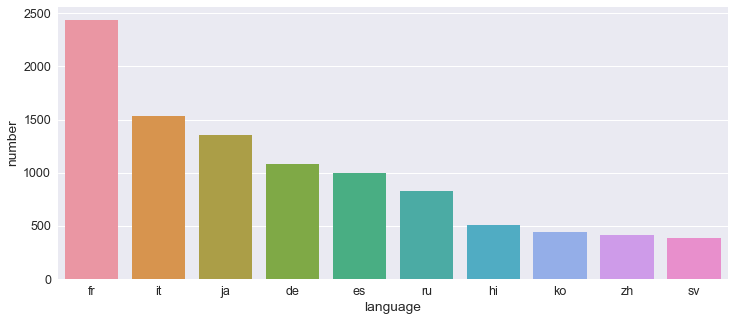

In [204]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

欢迎度及评分分析